In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
def get_part_indexes(cum_pers, left_threshold_per, right_threshold_per):
    cum_pers = cum_pers.round(decimals=1)
    cum_pers_right = cum_pers[cum_pers <= right_threshold_per]
    cum_pers_result = cum_pers_right[cum_pers_right > left_threshold_per]
    part_indexes = cum_pers_result.index.values
    return part_indexes

In [4]:
def to_analyze(data, per_a, per_b, per_c):
    total_value = data.sum()
    percents = data / total_value * 100.0
    cum_percents = percents.cumsum()
    percents = pd.concat([data, pd.concat([percents, cum_percents], axis=1)], axis=1)

    a_indexes = get_part_indexes(cum_percents, 0.0, per_a)
    a = data.loc[a_indexes]

    b_indexes = get_part_indexes(cum_percents, per_a, per_b)
    b = data.loc[b_indexes]

    c_indexes = get_part_indexes(cum_percents, per_b, per_c)
    c = data.loc[c_indexes]
    return total_value, percents, a, b, c

In [5]:
df = pd.read_csv("supermarket_sales - Sheet1.csv")

In [6]:
print(df.columns)
print(df.head())

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  

In [45]:
df_column = df['Total'].sort_values(ascending=False)

In [46]:
df_column

350    1042.6500
167    1039.2900
557    1034.4600
699    1023.7500
996    1022.4900
         ...    
402      14.6790
443      13.4190
223      13.1670
629      12.6945
822      10.6785
Name: Total, Length: 1000, dtype: float64

In [264]:
total_value, percents, a, b, c = to_analyze(df_column, 80, 95, 100)
df.groupby('Total').mean()


,Unit price,Quantity,Tax 5%,cogs,gross margin percentage,gross income,Rating
Total,,,,,,,
10.6785,10.17,1.0,0.5085,10.17,4.761905,0.5085,5.9
12.6945,12.09,1.0,0.6045,12.09,4.761905,0.6045,8.2
13.1670,12.54,1.0,0.6270,12.54,4.761905,0.6270,8.2
13.4190,12.78,1.0,0.6390,12.78,4.761905,0.6390,9.5
14.6790,13.98,1.0,0.6990,13.98,4.761905,0.6990,9.8
...,...,...,...,...,...,...,...
1022.4900,97.38,10.0,48.6900,973.80,4.761905,48.6900,4.4
1023.7500,97.50,10.0,48.7500,975.00,4.761905,48.7500,8.0
1034.4600,98.52,10.0,49.2600,985.20,4.761905,49.2600,4.5


In [265]:
df['Total']=labels
df.head(5)

NameError: name 'labels' is not defined

In [266]:
print(df_column)

350    1042.6500
167    1039.2900
557    1034.4600
699    1023.7500
996    1022.4900
         ...    
402      14.6790
443      13.4190
223      13.1670
629      12.6945
822      10.6785
Name: Total, Length: 1000, dtype: float64


In [267]:
df['Total'][a.index.values].head(5)
len(df['Total'][a.index.values])

497

In [268]:
df['Total'][b.index.values].head(5)
len(df['Total'][b.index.values])

267

In [269]:
df['Total'][c.index.values].head(5)
len(df['Total'][c.index.values])

236

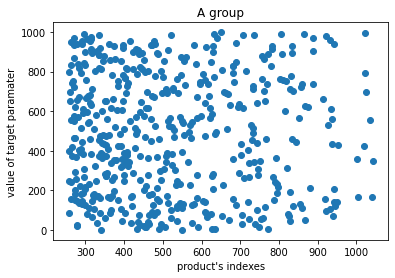

In [270]:
plt.scatter(df['Total'][a.index.values], a.index.values)
plt.xlabel('product\'s indexes')
plt.ylabel('value of target paramater')
plt.title('A group')
plt.savefig('abc_pictures/A_group.png', format='png', dpi=600)

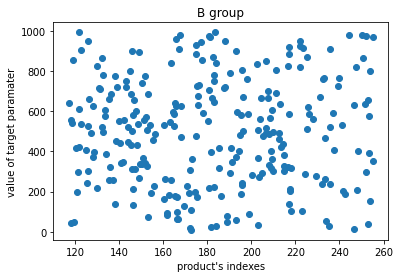

In [271]:
plt.scatter(df['Total'][b.index.values], b.index.values)
plt.xlabel('product\'s indexes')
plt.ylabel('value of target paramater')
plt.title('B group')
plt.savefig('abc_pictures/B_group.png', format='png', dpi=600)

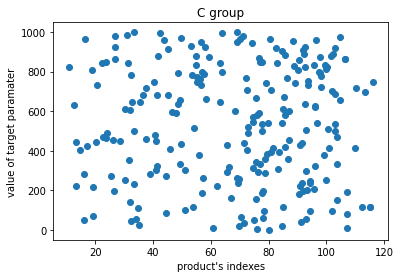

In [272]:
plt.scatter(df['Total'][c.index.values], c.index.values)
plt.xlabel('product\'s indexes')
plt.ylabel('value of target paramater')
plt.title('C group')
plt.savefig('abc_pictures/C_group.png', format='png', dpi=600)

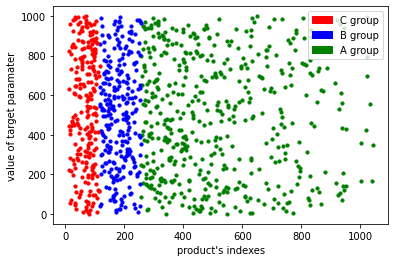

In [273]:
plt.scatter(df['Total'][a.index.values], a.index.values, color='green', s=10)
plt.scatter(df['Total'][b.index.values], b.index.values, color='blue', s=10)
plt.scatter(df['Total'][c.index.values], c.index.values, color='red', s=10)
plt.xlabel('product\'s indexes')
plt.ylabel('value of target paramater')
red_patch = mpatches.Patch(color='red', label='C group')
red_patch_1 = mpatches.Patch(color='blue', label='B group')
red_patch_2 = mpatches.Patch(color='green', label='A group')
plt.legend(handles=[red_patch, red_patch_1, red_patch_2])
plt.savefig('abc_pictures/all_groups.png', format='png', dpi=600)

In [11]:
df.groupby('df_column').mean()

KeyError: 'df_column'